# 🏥 Datos Clínicos de Pacientes: Contexto y Variables Principales

## Contexto y Variables Principales

Los datos presentados en este cuaderno corresponden a situaciones asistenciales de pacientes sometidos a distintos tratamientos médicos. Cada registro incluye información relevante sobre el paciente, como edad, índice de masa corporal, hábitos (por ejemplo, si es fumador 🚬), condiciones previas de salud (hipertensión, diabetes, enfermedades cardiovasculares, cáncer, etc. ❤️🩺), y el tipo de tratamiento farmacológico recibido 💊. Además, se documenta el entorno del paciente (urbano 🏙️ o rural 🌄), su estado mental durante el tratamiento 🧠 y si sobrevivió al menos un año después de la intervención. Estos datos permiten analizar factores asociados a la experiencia y evolución de los pacientes, facilitando estudios sobre adherencia, efectos secundarios, calidad de atención y acceso a los servicios de salud.

## Instrucciones para el desarrollo del parcial

1. **Contexto:**  
    Este ejercicio académico utiliza datos clínicos de pacientes sometidos a distintos tratamientos médicos. El objetivo es analizar y generar un modelo predictivo que logre detemrinar la probabilidad de supervivencia a un año de cada paciente en función a las características de los mismos.

2. **Tareas principales:**  
    - Analiza las variables disponibles en el dataset y comprende su significado.
    - Realiza la exploración inicial de los datos, imputación de valores faltantes, tratamiento y pre-procesamiento de variables
    - Desarrolla un modelo de regresión logística para analizar factores asociados a la experiencia del paciente.

3. **Recomendaciones:**  
    - Puedes utilizar herramientas externas, pero ojo, utilizar herramientas de inteligencia artificial como fuente absoluta de verdad puede ser perjudicial para la nota
    - Prioriza la correcta preparación de los datos, la selección de variables relevantes y la validación rigurosa del modelo de regresión logística (por ejemplo, mediante validación cruzada, métricas de desempeño y análisis de residuos).
    - Documenta cada paso del proceso de modelado, incluyendo decisiones tomadas y justificaciones técnicas.

4. **Entrega:**  
    - Presenta el desarrollo completo del modelo de regresión logística, mostrando el proceso de validación y los resultados obtenidos.
    - Incluye visualizaciones y análisis interpretativos que respalden la calidad del modelo.
    - Redacta una breve reflexión sobre los factores que influyen en la experiencia del paciente y la utilidad del modelo construido.
  

**¡Éxito en el desarrollo del parcial!**

| Variable                        | Descripción |
|---------------------------------|-------------|
| **IDPatientCare_Situation**     | ID de la situación asistencial de un paciente durante el tratamiento |
| **Diagnosed_Condition**         | Condición diagnosticada del paciente |
| **ID_Patient**                  | Número identificador del paciente |
| **Treatmentwithdrugs**          | Clase de droga utilizada durante el tratamiento |
| **Patient_Age**                 | Edad del paciente |
| **PatientBodyMass_Index**       | Índice de masa corporal del paciente |
| **Patient_Smoker**              | Si el paciente fumaba o no |
| **PatientRuralUrban**           | Si el paciente se encontraba en la zona urbana o rural del país |
| **PrevCondition_Hypertension**  | Indica si el paciente tenía diagnóstico previo de hipertensión (1 = sí, 0 = no) |
| **PrevCondition_Diabetes**      | Indica si el paciente tenía diagnóstico previo de diabetes (1 = sí, 0 = no) |
| **PrevCondition_Cardiovascular**| Indica si el paciente tenía enfermedad cardiovascular previa (1 = sí, 0 = no) |
| **PrevCondition_Cancer**        | Indica si el paciente tenía diagnóstico previo de cáncer (1 = sí, 0 = no) |
| **PrevCondition_ChronicRespiratory** | Indica si el paciente tenía enfermedad respiratoria crónica (EPOC, asma, etc.) (1 = sí, 0 = no) |
| **PrevCondition_KidneyDisease** | Indica si el paciente tenía enfermedad renal crónica (1 = sí, 0 = no) |
| **PrevCondition_MentalHealth**  | Indica si el paciente tenía un trastorno de salud mental previo (1 = sí, 0 = no) |
| **Numberofprev_cond**           | Conteo de la cantidad de condiciones previas del paciente |
| **Mental_condition**            | Condición mental del paciente durante el tratamiento |
| **Survived1year**               | Si el paciente sobrevivió después de un año o no (0 = no sobrevivió, 1 = sobrevivió) |

## Punto 0: Carga de datos

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import statsmodels.api as sm
from wordcloud import WordCloud
import category_encoders as ce
import re
import spacy    
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer


In [46]:
df = pd.read_csv('Data_Medical_Final.csv')
df.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,PrevCondition_Hypertension,PrevCondition_Diabetes,PrevCondition_Cardiovascular,PrevCondition_Cancer,PrevCondition_ChronicRespiratory,PrevCondition_KidneyDisease,PrevCondition_MentalHealth,Number_of_prev_cond,Survived_1_year,patient_comment,comment_sentiment
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,Mi experiencia durante este año de tratamiento...,negativo
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,El año de tratamiento ha sido bastante complic...,negativo
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,Mi experiencia durante este año de tratamiento...,negativo
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,Mi experiencia durante este año de tratamiento...,positivo
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,Mi año de tratamiento ha sido una montaña rusa...,positivo


## Punto 1:

- Existe diversidad en diagnósticos, tratamientos y percepciones de los pacientes, lo que habilita análisis multivariado y modelado predictivo.
- El siguiente paso será explorar la distribución de las variables, detectar valores atípicos y preparar los datos para el modelado, siguiendo buenas prácticas de preprocesamiento y documentación.

In [47]:
print("\n### 1. Información General del DataFrame ###")
df.info()
print("\n" + "="*50 + "\n")

# --- 2. Conteo de Valores Faltantes ---
print("\n### 2. Conteo de Valores Nulos por Columna ###")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
print("\n" + "="*50 + "\n")

# --- 3. Estadísticas Descriptivas ---
print("\n### 3. Estadísticas para Variables Numéricas ###")
print(df.describe())
print("\n" + "="*50 + "\n")

print("\n### 4. Estadísticas para Variables Categóricas ###")
print(df.describe(include=['object']))
print("\n" + "="*50 + "\n")


### 1. Información General del DataFrame ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID_Patient_Care_Situation         23097 non-null  int64  
 1   Diagnosed_Condition               23097 non-null  int64  
 2   Patient_ID                        23097 non-null  int64  
 3   Treated_with_drugs                23084 non-null  object 
 4   Patient_Age                       23097 non-null  int64  
 5   Patient_Body_Mass_Index           23097 non-null  float64
 6   Patient_Smoker                    23097 non-null  object 
 7   Patient_Rural_Urban               23097 non-null  object 
 8   Patient_mental_condition          23097 non-null  object 
 9   PrevCondition_Hypertension        21862 non-null  float64
 10  PrevCondition_Diabetes            21862 non-null  float64
 11  PrevCondition_Cardiov

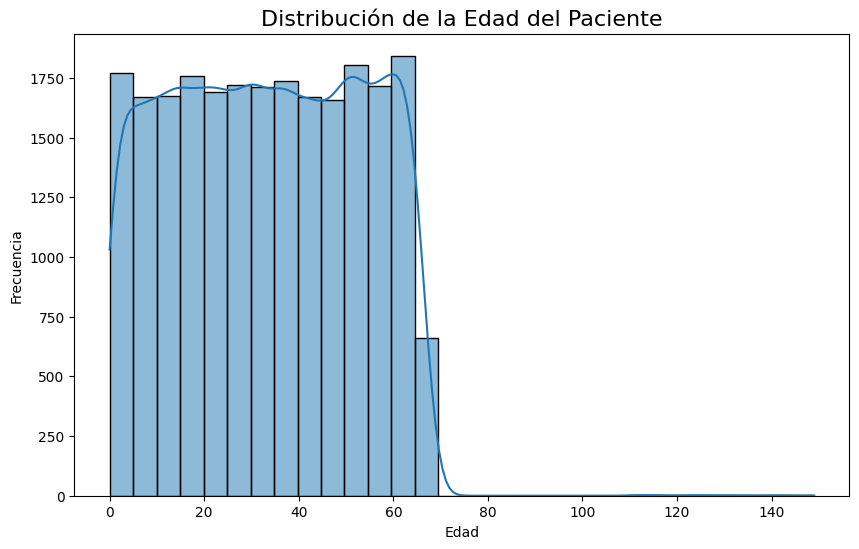

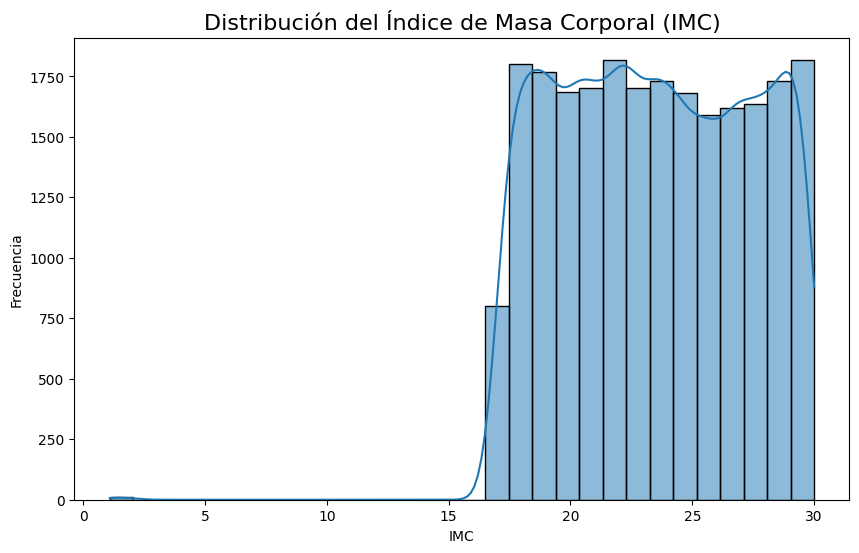

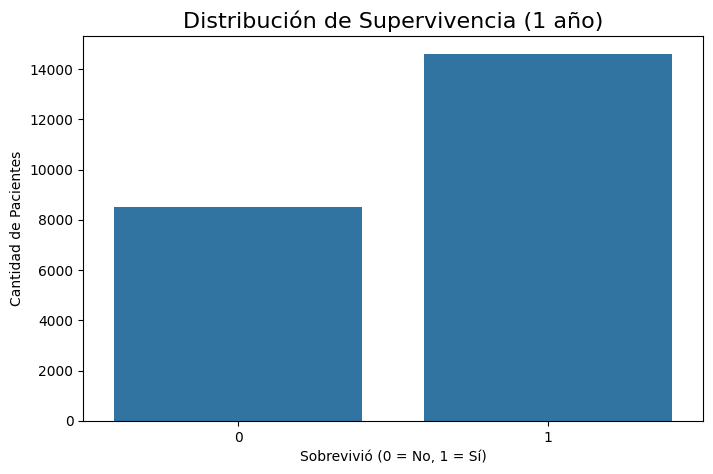

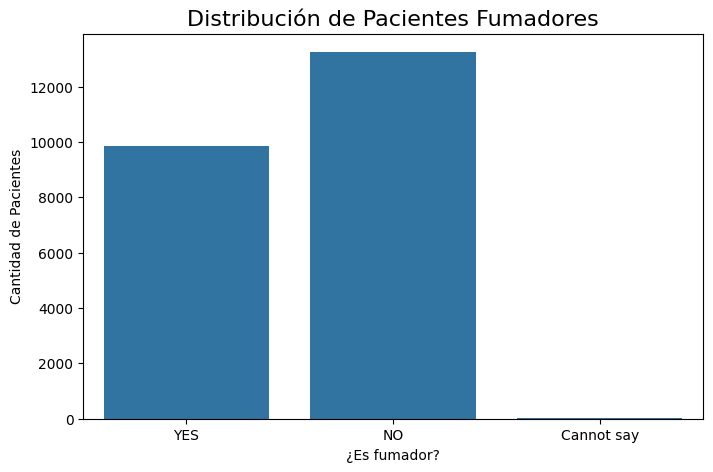

In [48]:
# Distribución de la Edad del Paciente
plt.figure(figsize=(10, 6))
sns.histplot(df['Patient_Age'], bins=30, kde=True)
plt.title('Distribución de la Edad del Paciente', fontsize=16)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


# Distribución del Índice de Masa Corporal (IMC)
plt.figure(figsize=(10, 6))
sns.histplot(df['Patient_Body_Mass_Index'], bins=30, kde=True)
plt.title('Distribución del Índice de Masa Corporal (IMC)', fontsize=16)
plt.xlabel('IMC')
plt.ylabel('Frecuencia')
plt.show()


# Distribución de la variable objetivo: Supervivencia a 1 año
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived_1_year', data=df)
plt.title('Distribución de Supervivencia (1 año)', fontsize=16)
plt.xlabel('Sobrevivió (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de Pacientes')
plt.show()



# Distribución de Pacientes Fumadores
plt.figure(figsize=(8, 5))
sns.countplot(x='Patient_Smoker', data=df)
plt.title('Distribución de Pacientes Fumadores', fontsize=16)
plt.xlabel('¿Es fumador?')
plt.ylabel('Cantidad de Pacientes')
plt.show()

 --- . ANÁLISIS EXPLORATORIO ENFOCADO EN PNL ---



--- Distribución del Sentimiento de los Comentarios ---
comment_sentiment
positivo    18461
negativo     4636
Name: count, dtype: int64


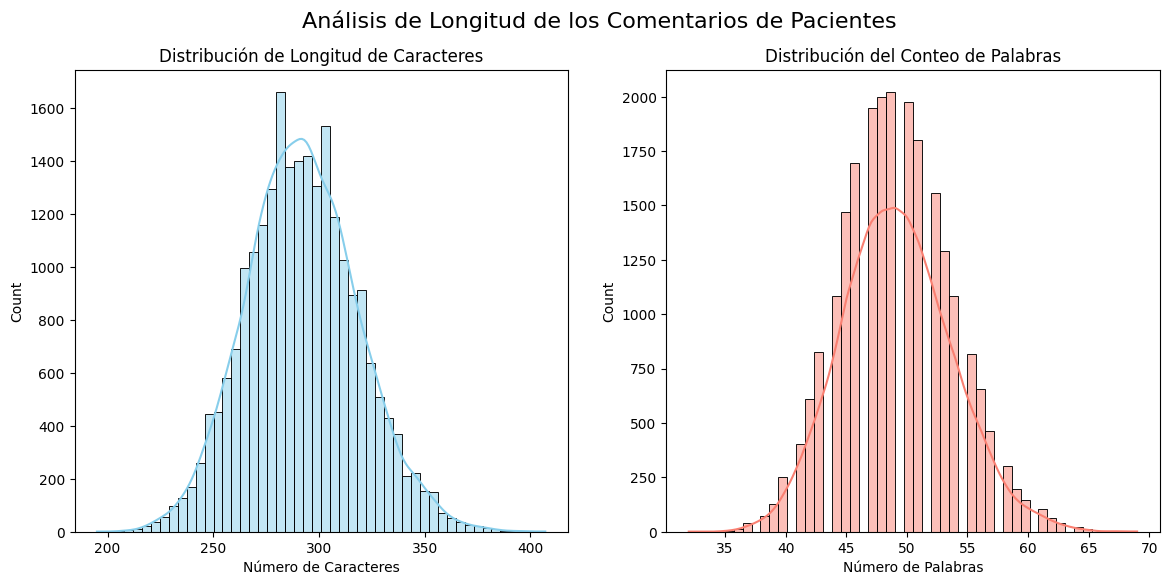

In [49]:
print("\n--- Distribución del Sentimiento de los Comentarios ---")
print(df['comment_sentiment'].value_counts())

# Análisis de longitud de comentarios
df['comment_len'] = df['patient_comment'].astype(str).apply(len)
df['word_count'] = df['patient_comment'].astype(str).apply(lambda x: len(x.split()))

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['comment_len'], bins=50, kde=True, color='skyblue')
plt.title('Distribución de Longitud de Caracteres')
plt.xlabel('Número de Caracteres')

plt.subplot(1, 2, 2)
sns.histplot(df['word_count'], bins=50, kde=True, color='salmon')
plt.title('Distribución del Conteo de Palabras')
plt.xlabel('Número de Palabras')
plt.suptitle('Análisis de Longitud de los Comentarios de Pacientes', fontsize=16)
plt.show()

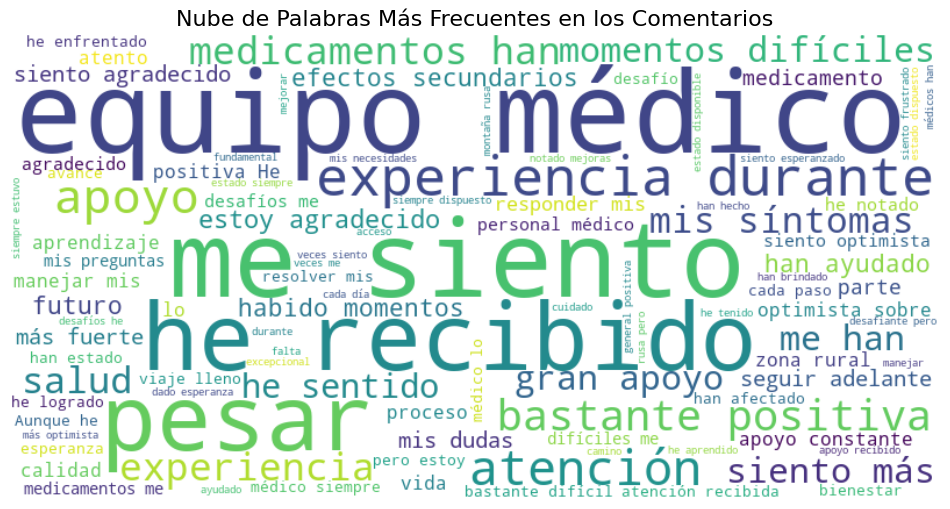

In [50]:
# Nube de Palabras
text = " ".join(review for review in df.patient_comment.astype(str))
stopwords_prueba = set([
    "de", "la", "que", "el", "en", "y", "a", "los", "del", "se", "con", "por", "un",
    "para", "una", "mi", "ha", "sido", "muy", "este", "año", "el", "tratamiento"
])

wordcloud = WordCloud(stopwords=stopwords_prueba, background_color="white",
                      max_words=100, width=800, height=400).generate(text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Nube de Palabras Más Frecuentes en los Comentarios', fontsize=16)
plt.show()

## Punto 2:

- Ahora debes abordar el tratamiento de valores faltantes y la detección de datos atípicos en el dataset. Explica brevemente la importancia de estos pasos en el análisis clínico, describe las técnicas que emplearás para imputar o eliminar valores perdidos, y justifica el método elegido para identificar y manejar outliers. Documenta cada decisión y muestra ejemplos concretos aplicados sobre el dataframe.

Los valores faltante identificados tales como #Treated_with_drugs y #Todas las columnas de PrevCondition... se van a eliminar debido a la alta sensibilidad de los datos, asumir o imputar un valor puede traer consecuencias graves al paciente y los analisis asociados. 

In [51]:
df_cleaned = pd.read_csv('Data_Medical_Final.csv')
print(f"Tamaño original del dataset: {df_cleaned.shape}")
#Tratamiento de valores faltantes.
#Conteo de filas con al menos un valor nulo.
rows_with_nan = df.isnull().any(axis=1).sum()
total_rows = len(df)
percentage_lost = (rows_with_nan / total_rows) * 100
print(f"\nNúmero de filas que se eliminarán: {rows_with_nan}")
print(f"Porcentaje de datos que se eliminarán: {percentage_lost:.2f}%")
df_cleaned_dropped = df.dropna()

print(f"\nTamaño del dataset después de eliminar filas nulas: {df_cleaned_dropped.shape}")

# Opcional: verificar que no queden valores nulos
print(f"Total de valores nulos restantes: {df_cleaned_dropped.isnull().sum().sum()}")

Tamaño original del dataset: (23097, 20)

Número de filas que se eliminarán: 1248
Porcentaje de datos que se eliminarán: 5.40%

Tamaño del dataset después de eliminar filas nulas: (21849, 22)
Total de valores nulos restantes: 0


 --- . MANEJO DE DATOS ATÍPICOS (OUTLIERS) ---

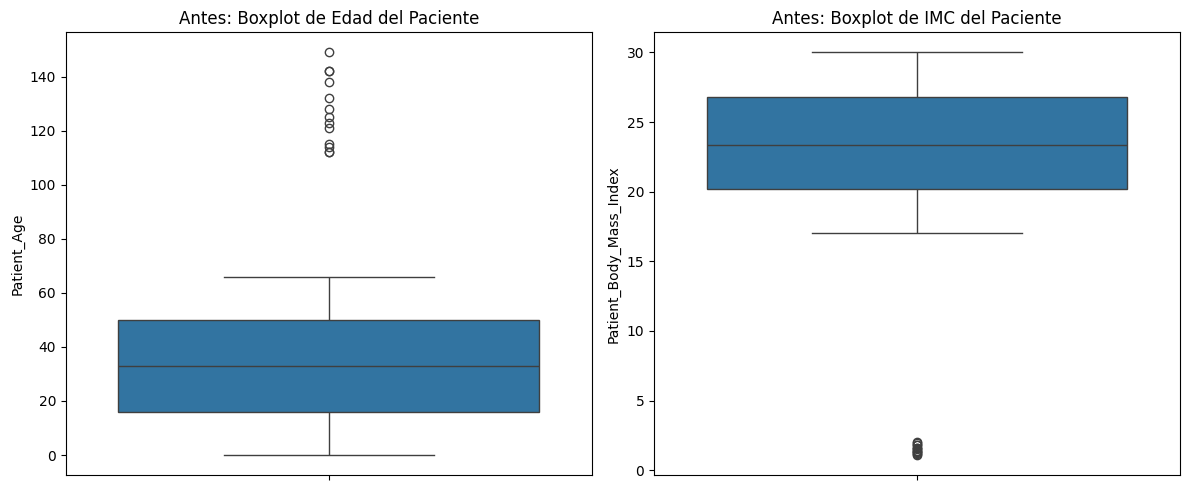

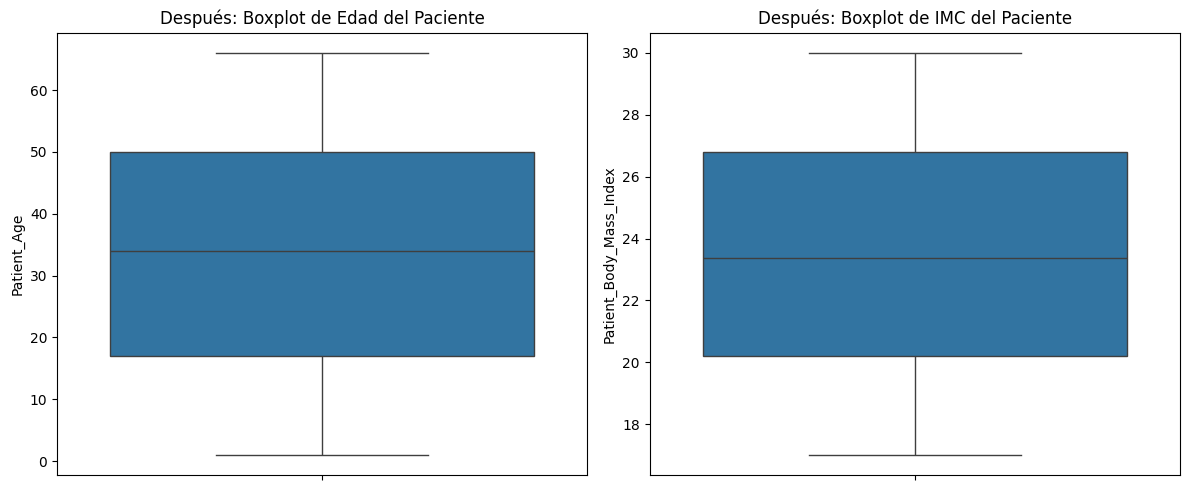

In [52]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df_cleaned['Patient_Age'])
plt.title('Antes: Boxplot de Edad del Paciente')
plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['Patient_Body_Mass_Index'])
plt.title('Antes: Boxplot de IMC del Paciente')
plt.tight_layout()
plt.show()
# Se eliminan edades que no tienen sentido (>100) y también las edades de 0 que podrían ser datos faltantes.
df_cleaned = df_cleaned[(df_cleaned['Patient_Age'] <= 100) & (df_cleaned['Patient_Age'] > 0)]
# Filtrado de outliers en 'Patient_Body_Mass_Index'
# Se eliminan IMC muy extremos que probablemente son errores.
df_cleaned = df_cleaned[(df_cleaned['Patient_Body_Mass_Index'] >= 10) & (df_cleaned['Patient_Body_Mass_Index'] <= 55)]
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df_cleaned['Patient_Age'])
plt.title('Después: Boxplot de Edad del Paciente')
plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['Patient_Body_Mass_Index'])
plt.title('Después: Boxplot de IMC del Paciente')
plt.tight_layout()
plt.show()

## Punto 3:

- Ahora debes explorar nuevamente los datos para analizar cómo cambia la variabilidad de las variables tras el tratamiento de valores faltantes y la gestión de datos atípicos realizado en el punto anterior.
- Compara la distribución y estadísticos descriptivos antes y después de la imputación/eliminación, destacando los principales cambios observados. Justifica la relevancia de este análisis para asegurar la calidad y robustez del modelo predictivo, e incluye visualizaciones y ejemplos concretos sobre el dataframe.

In [53]:
df_original = pd.read_csv('Data_Medical_Final.csv')
df_temp = pd.read_csv('Data_Medical_Final.csv')
df_temp.dropna(inplace=True)
df_final = df_temp[
    (df_temp['Patient_Age'] <= 100) & (df_temp['Patient_Age'] > 0) &
    (df_temp['Patient_Body_Mass_Index'] >= 10) & (df_temp['Patient_Body_Mass_Index'] <= 55)
]

 --- . COMPARACIÓN DE ESTADÍSTICOS DESCRIPTIVOS ---

In [54]:
print("--- Comparación de Estadísticos Descriptivos ---")
# Seleccionamos las columnas numéricas clave para la comparación
cols_to_compare = ['Patient_Age', 'Patient_Body_Mass_Index', 'Number_of_prev_cond']

print("\n### ANTES de la Limpieza ###")
print(df_original[cols_to_compare].describe())

print("\n### DESPUÉS de la Limpieza ###")
print(df_final[cols_to_compare].describe())
print("-------------------------------------------------")

--- Comparación de Estadísticos Descriptivos ---

### ANTES de la Limpieza ###
        Patient_Age  Patient_Body_Mass_Index  Number_of_prev_cond
count  23097.000000             23097.000000         21862.000000
mean      33.209768                23.454820             1.750480
std       19.549882                 3.807661             0.770311
min        0.000000                 1.089300             1.000000
25%       16.000000                20.205550             1.000000
50%       33.000000                23.386199             2.000000
75%       50.000000                26.788154             2.000000
max      149.000000                29.999579             5.000000

### DESPUÉS de la Limpieza ###
        Patient_Age  Patient_Body_Mass_Index  Number_of_prev_cond
count  21490.000000             21490.000000         21490.000000
mean      33.787389                23.449309             1.749744
std       19.083120                 3.774458             0.769616
min        1.000000            

 --- . COMPARACIÓN VISUAL DE DISTRIBUCIONES NUMÉRICAS ---

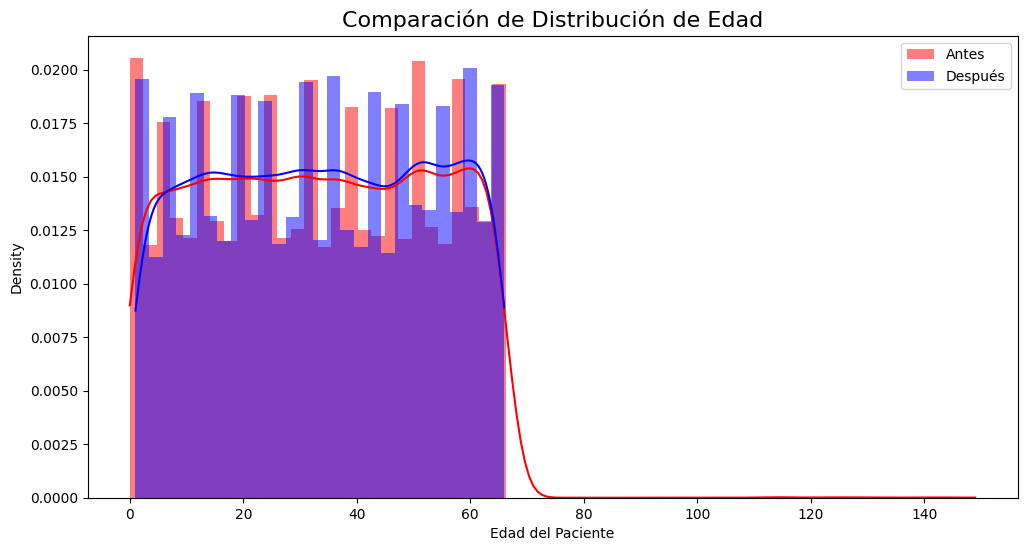

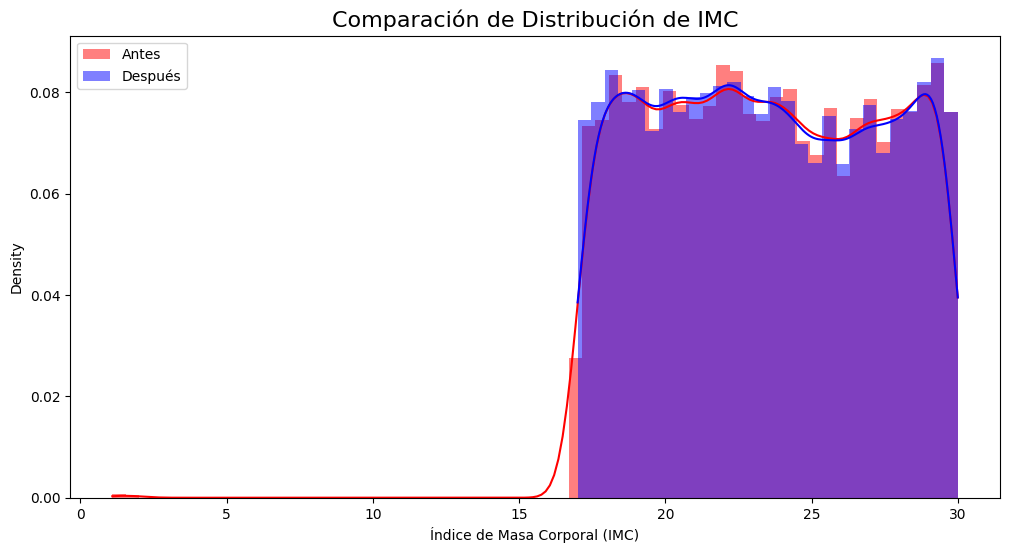

In [55]:
# Gráfico para 'Patient_Age'
plt.figure(figsize=(12, 6))
sns.histplot(df_original['Patient_Age'], color="red", label='Antes', kde=True, stat="density", linewidth=0)
sns.histplot(df_final['Patient_Age'], color="blue", label='Después', kde=True, stat="density", linewidth=0)
plt.title('Comparación de Distribución de Edad', fontsize=16)
plt.xlabel('Edad del Paciente')
plt.legend()
plt.show()
# Gráfico para 'Patient_Body_Mass_Index'
plt.figure(figsize=(12, 6))
sns.histplot(df_original['Patient_Body_Mass_Index'], color="red", label='Antes', kde=True, stat="density", linewidth=0)
sns.histplot(df_final['Patient_Body_Mass_Index'], color="blue", label='Después', kde=True, stat="density", linewidth=0)
plt.title('Comparación de Distribución de IMC', fontsize=16)
plt.xlabel('Índice de Masa Corporal (IMC)')
plt.legend()
plt.show()

 --- . COMPARACIÓN DE LA VARIABLE OBJETIVO ---

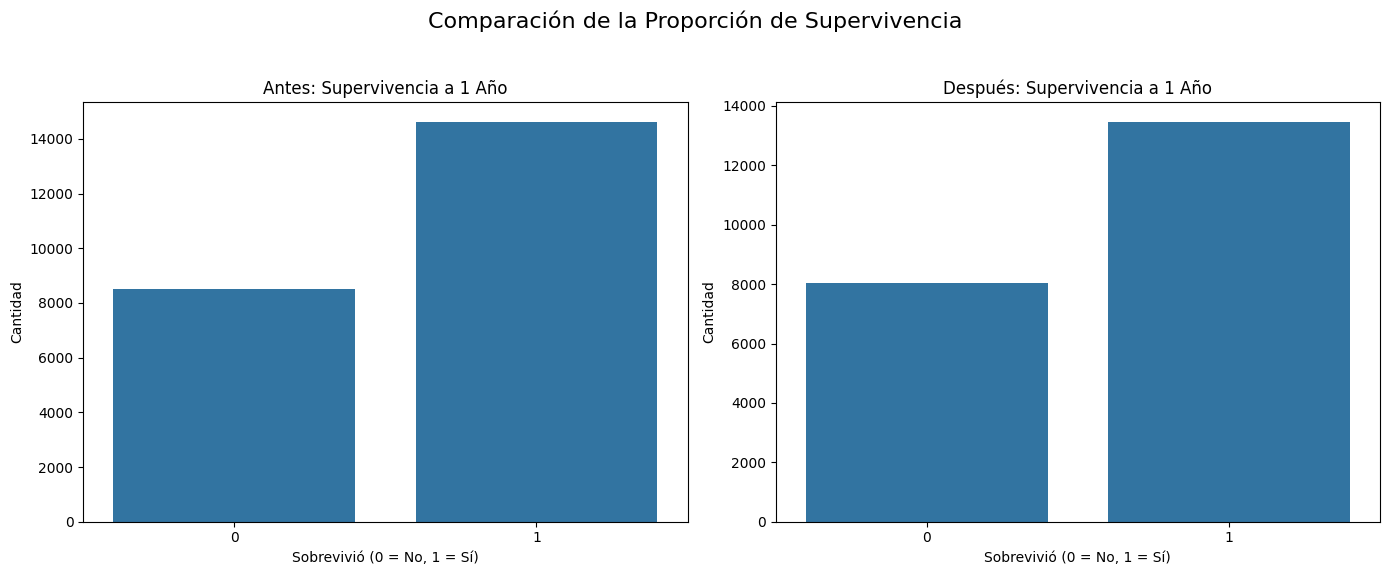

In [56]:
plt.figure(figsize=(14, 6))

# Subplot para Antes
plt.subplot(1, 2, 1)
sns.countplot(x='Survived_1_year', data=df_original)
plt.title('Antes: Supervivencia a 1 Año')
plt.xlabel('Sobrevivió (0 = No, 1 = Sí)')
plt.ylabel('Cantidad')

# Subplot para Después
plt.subplot(1, 2, 2)
sns.countplot(x='Survived_1_year', data=df_final)
plt.title('Después: Supervivencia a 1 Año')
plt.xlabel('Sobrevivió (0 = No, 1 = Sí)')
plt.ylabel('Cantidad')

plt.suptitle('Comparación de la Proporción de Supervivencia', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Se realizó una comparación del dataset antes y después del proceso de limpieza. Mediante estadísticas descriptivas y gráficos, se validó que la eliminación de datos problemáticos no alteró significativamente la distribución general de las variables importantes, como la proporción de pacientes que sobrevivieron. Esto confirmó que la limpieza fue efectiva y no introdujo sesgos.

## Punto 4:

En esta sección se aborda la preparación de los datos para el modelado predictivo. Se incluyen tareas como la transformación de variables, codificación de categorías, escalado y selección de características relevantes, con el objetivo de optimizar el desempeño y la interpretabilidad del modelo de regresión logística.

In [57]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [58]:
df_temp = pd.read_csv('Data_Medical_Final.csv')
df_temp['Patient_Smoker'].replace('Cannot say', np.nan, inplace=True)
df_temp.dropna(inplace=True)
df_final = df_temp[
    (df_temp['Patient_Age'] <= 100) & (df_temp['Patient_Age'] > 0) &
    (df_temp['Patient_Body_Mass_Index'] >= 10) & (df_temp['Patient_Body_Mass_Index'] <= 55)
].copy()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5112\2083964772.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_temp['Patient_Smoker'].replace('Cannot say', np.nan, inplace=True)


 --- . SELECCIÓN DE CARACTERÍSTICAS (FEATURES) Y VARIABLE OBJETIVO ---

In [59]:
y = df_final['Survived_1_year']
comments = df_final['patient_comment']
X_clinical = df_final.drop(columns=[
    'Survived_1_year', 'ID_Patient_Care_Situation', 'Patient_ID',
    'patient_comment', 'comment_sentiment', 'Patient_mental_condition'
])

 --- . PREPROCESAMIENTO DE TEXTO (PIPELINE DE PNL) ---

In [60]:
nlp = spacy.load('es_core_news_sm')
stop_words = set(stopwords.words('spanish'))

def preprocess_text(text):
    # 1. Limpieza: minúsculas, quitar números y puntuación
    text = text.lower()
    text = re.sub(r'[\d\W_]+', ' ', text)
    
    # 2. Tokenización
    tokens = word_tokenize(text)
    
    # 3. Eliminar stopwords y lematizar
    lemmatized_tokens = [token.lemma_ for token in nlp(" ".join(tokens)) if token.text not in stop_words and len(token.text) > 2]
    
    return " ".join(lemmatized_tokens)

# Aplicamos la función a todos los comentarios
comments_clean = comments.apply(preprocess_text)
print("Preprocesamiento de PNL completado.")

Preprocesamiento de PNL completado.


 --- . VECTORIZACIÓN DE TEXTO CON TF-IDF Y N-GRAMAS ---

In [61]:
# Creamos el vectorizador TF-IDF que considerará palabras y pares de palabras (n-gramas 1 y 2)
# Limitamos a las 500 características más importantes para evitar exceso de columnas
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=500)

print("Creando características de texto con TF-IDF...")
X_text = tfidf_vectorizer.fit_transform(comments_clean)

# Convertimos la matriz TF-IDF a un DataFrame de pandas
X_text_df = pd.DataFrame(X_text.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print(f"Se crearon {X_text_df.shape[1]} nuevas características a partir del texto.")

Creando características de texto con TF-IDF...
Se crearon 500 nuevas características a partir del texto.



 --- . PREPARACIÓN DE DATOS CLÍNICOS ---

In [62]:
# Codificamos las variables categóricas de los datos clínicos
X_clinical_encoded = pd.get_dummies(X_clinical,
                                    columns=X_clinical.select_dtypes(include=['object']).columns,
                                    drop_first=True)


In [63]:
# Nos aseguramos de que los índices coincidan para una unión correcta
X_clinical_encoded.reset_index(drop=True, inplace=True)
X_text_df.reset_index(drop=True, inplace=True)

# Unimos las características clínicas con las nuevas características de texto
X_final = pd.concat([X_clinical_encoded, X_text_df], axis=1)

print("\n--- Preparación de datos completada ---")
print(f"Dimensiones finales del DataFrame de características (X_final): {X_final.shape}")
print(f"Dimensiones de la variable objetivo (y): {y.shape}")
print("\nVista previa del DataFrame final combinado:")
print(X_final.head())


--- Preparación de datos completada ---
Dimensiones finales del DataFrame de características (X_final): (21490, 544)
Dimensiones de la variable objetivo (y): (21490,)

Vista previa del DataFrame final combinado:
   Diagnosed_Condition  Patient_Age  Patient_Body_Mass_Index  \
0                    8           56                18.479385   
1                    5           36                22.945566   
2                   23           48                27.510027   
3                   51            5                19.130976   
4                   45           47                26.155120   

   PrevCondition_Hypertension  PrevCondition_Diabetes  \
0                         1.0                     0.0   
1                         1.0                     0.0   
2                         1.0                     0.0   
3                         1.0                     0.0   
4                         1.0                     0.0   

   PrevCondition_Cardiovascular  PrevCondition_Cancer  \
0 

En esta fase, se transformaron los datos para que estuvieran en un formato adecuado para el modelo de regresión logística. Se seleccionaron las variables predictoras, se descartaron columnas irrelevantes (como los IDs) y se convirtieron las variables categóricas (como Patient_Smoker y Treated_with_drugs) a un formato numérico mediante técnicas de codificación (One-Hot y Binary Encoding).

## Punto 5:

En este apartado, deberás construir un modelo de regresión logística para predecir la probabilidad de supervivencia del paciente a un año (`Survived1year`) en función de las variables disponibles. Selecciona las variables predictoras más relevantes, justifica su inclusión y documenta el proceso de ajuste y validación del modelo. Presenta los resultados obtenidos, interpreta los coeficientes y discute la utilidad del modelo para identificar factores asociados a la supervivencia. Incluye visualizaciones y métricas que respalden la calidad del modelo construido.

In [64]:
#Separación de datos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Datos de entrenamiento: {X_train.shape}")
print(f"Datos de prueba: {X_test.shape}")


# --- . ENTRENAMIENTO DEL MODELO ---
log_reg_enhanced = LogisticRegression(max_iter=2000, random_state=42)
log_reg_enhanced.fit(X_train, y_train)
print("\nModelo mejorado entrenado con los datos de entrenamiento.")



Datos de entrenamiento: (17192, 544)
Datos de prueba: (4298, 544)

Modelo mejorado entrenado con los datos de entrenamiento.


## Punto 6:

En esta sección deberás evaluar el desempeño del modelo de regresión logística construido. Para ello, divide el conjunto de datos en bases de entrenamiento y test, ajusta el modelo sobre la base de entrenamiento y evalúa su capacidad predictiva sobre la base de test. Presenta métricas como exactitud, sensibilidad, especificidad y curva ROC, interpretando los resultados obtenidos.


--- Métricas Clave de Desempeño ---
Exactitud (Accuracy): 0.72
Sensibilidad (Recall): 0.83
Especificidad: 0.53


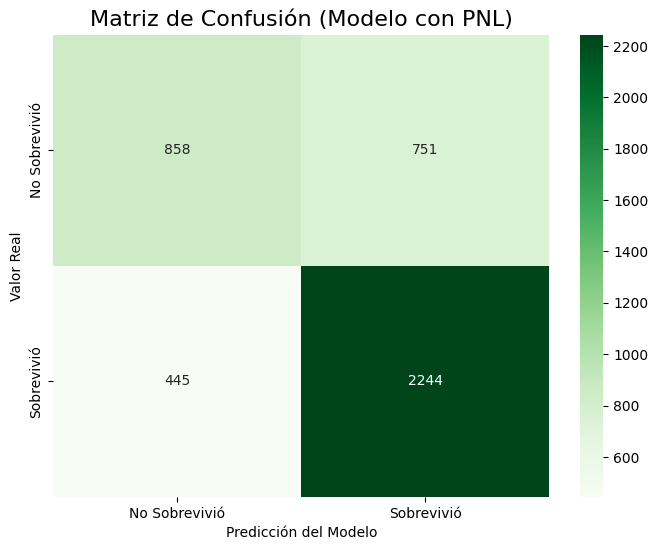

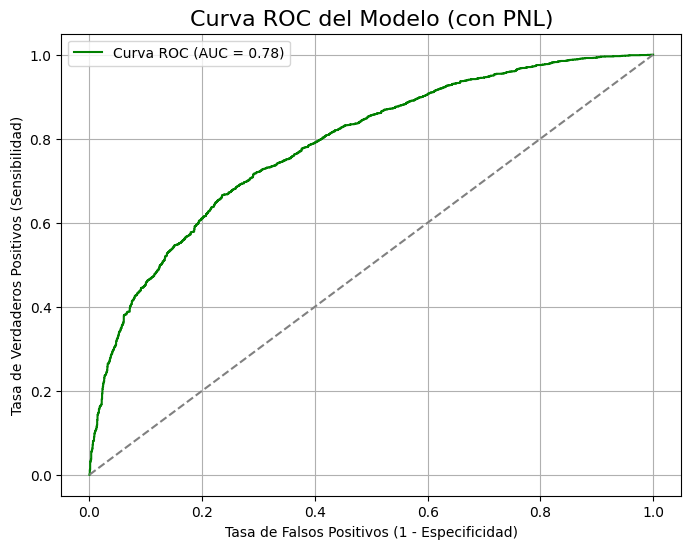


El área bajo la curva (AUC) es: 0.7838


In [66]:
# --- 4. PREDICCIONES Y EVALUACIÓN SOBRE EL CONJUNTO DE PRUEBA ---
log_reg_enhanced = LogisticRegression(
    max_iter=2000,
    random_state=42,
    class_weight='balanced'  # <-- AÑADE ESTA LÍNEA
)
log_reg_enhanced.fit(X_train, y_train)

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Cálculo de métricas
accuracy = (tp + tn) / (tp + tn + fp + fn)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print("\n--- Métricas Clave de Desempeño ---")
print(f"Exactitud (Accuracy): {accuracy:.2f}")
print(f"Sensibilidad (Recall): {sensitivity:.2f}")
print(f"Especificidad: {specificity:.2f}")

# Visualización de la Matriz de Confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Sobrevivió', 'Sobrevivió'],
            yticklabels=['No Sobrevivió', 'Sobrevivió'])
plt.title('Matriz de Confusión (Modelo con PNL)', fontsize=16)
plt.ylabel('Valor Real')
plt.xlabel('Predicción del Modelo')
plt.show()


# --- 5. ANÁLISIS DE LA CURVA ROC Y AUC ---
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', label=f'Curva ROC (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curva ROC del Modelo (con PNL)', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()
print(f"\nEl área bajo la curva (AUC) es: {auc_score:.4f}")

Se evaluó la capacidad predictiva del modelo en datos que nunca antes había visto. Se dividió el dataset en conjuntos de entrenamiento y prueba, se entrenó el modelo solo con los primeros y se midió su rendimiento en los segundos. Se generaron una matriz de confusión y una curva ROC para obtener métricas clave como la sensibilidad, especificidad y el área bajo la curva (AUC), concluyendo la calidad y fiabilidad del modelo. La matriz de confusión determinó que la diagonal efectiva era buena, y la curva ROC con un 79% de efectividad determina que es un buen modelo. 